In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("../raw_data/CCLE_Expression_Entrez_2012-09-29.gct", 
                 delimiter="\t", low_memory=False, index_col="Name")

df = df[pd.notnull(df.Description)] # drop the rows where gene is nan
print df.head()

               Description  LN18_CENTRAL_NERVOUS_SYSTEM  769P_KIDNEY  \
Name                                                                   
100009676_at  LOC100009676                     5.987545     5.444892   
10000_at              AKT3                     6.230233     7.544216   
10001_at              MED6                     9.363550     8.715909   
10002_at             NR2E3                     3.803069     4.173643   
10003_at           NAALAD2                     3.586430     3.663081   

              786O_KIDNEY  CAOV3_OVARY  HEPG2_LIVER  \
Name                                                  
100009676_at     5.838828     6.074743     5.788600   
10000_at         7.328450     4.270720     4.478293   
10001_at         8.410834     9.845271     9.761157   
10002_at         3.776557     3.934091     3.822202   
10003_at         4.047007     3.817250     6.444302   

              MOLT4_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  NCIH524_LUNG  \
Name                                 

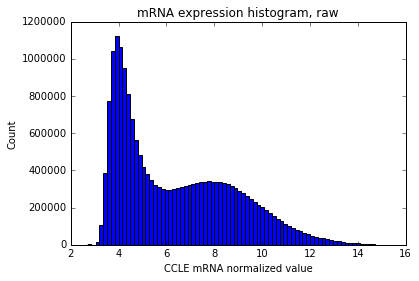

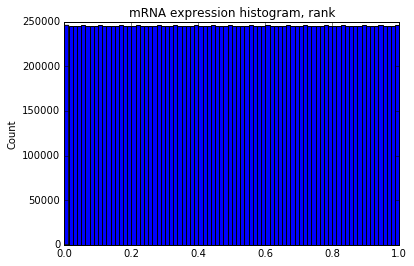

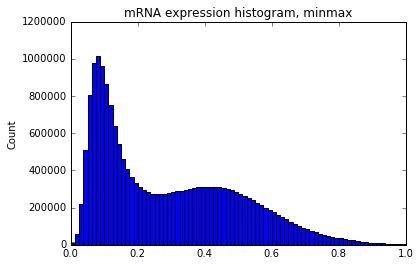

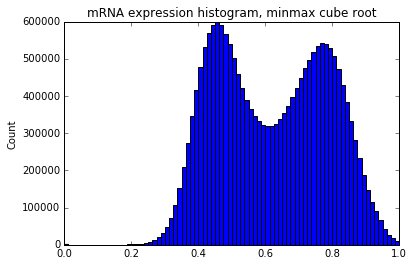

In [10]:
plt.figure(1)
df = pd.read_csv("../raw_data/CCLE_Expression_Entrez_2012-09-29.gct", 
                 delimiter="\t", low_memory=False, index_col="Name")
df = df[pd.notnull(df.Description)] # drop the rows where gene is nan
df1 = df.drop("Description", axis=1)
all_values = df1.values.flatten()
plt.hist(all_values, bins=80)
plt.title("mRNA expression histogram, raw")
plt.xlabel("CCLE mRNA normalized value")
plt.ylabel("Count")

plt.figure(2)
df = pd.read_csv("../raw_data/CCLE_Expression_Entrez_2012-09-29.percent.gct", 
                 delimiter="\t", low_memory=False)
df = df[pd.notnull(df.Description)] # drop the rows where gene is nan
df1 = df.drop("Description", axis=1)
all_values = df1.values.flatten()
plt.hist(all_values, bins=80)
plt.title("mRNA expression histogram, rank")
plt.xlabel("")
plt.ylabel("Count")

plt.figure(3)
df = pd.read_csv("../raw_data/CCLE_Expression_Entrez_2012-09-29.minmax.gct", 
                 delimiter="\t", low_memory=False)
df = df[pd.notnull(df.Description)] # drop the rows where gene is nan
df1 = df.drop("Description", axis=1)
all_values = df1.values.flatten()
plt.hist(all_values, bins=80)
plt.title("mRNA expression histogram, minmax")
plt.xlabel("")
plt.ylabel("Count")

plt.figure(4)
df = df1.applymap(lambda x: x**(1.0/3))
all_values = df.values.flatten()
plt.hist(all_values, bins=80)
plt.title("mRNA expression histogram, minmax cube root")
plt.xlabel("")
plt.ylabel("Count")

1255 17646


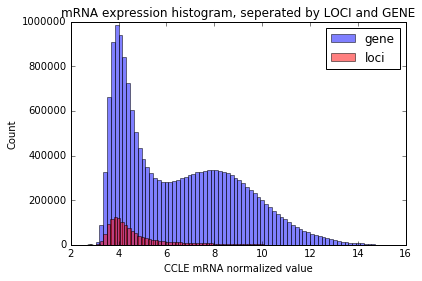

In [30]:
# seperately plot normal gene and loci gene mRNA data
df_loci = df[df["Description"].str.contains("LOC")]
df_gene = df[~df["Description"].str.contains("LOC")]
print len(df_loci), len(df_gene)

df_loci = df_loci.drop("Description", axis=1)
df_gene = df_gene.drop("Description", axis=1)
all_values_loci = df_loci.values.flatten()
all_values_gene = df_gene.values.flatten()

plt.hist(all_values_gene, bins=80, label="gene", alpha=0.5, color="blue")
plt.hist(all_values_loci, bins=80, label="loci", alpha=0.5, color="red")

plt.title("mRNA expression histogram, seperated by LOCI and GENE")
plt.xlabel("CCLE mRNA normalized value")
plt.ylabel("Count")
plt.legend(loc='upper right')

In [24]:
print np.percentile(all_values, 99.9)
print np.percentile(all_values, 0.001)
print np.max(all_values)
print np.min(all_values)

14.18409
2.9224488422
15.53206
2.716615


In [23]:
toy_df = df[["Description", "IGROV1_OVARY", "COLO741_SKIN", "TC71_BONE", "HPAFII_PANCREAS", "NCIH1792_LUNG"]]
toy_df = toy_df[toy_df.Description.isin(["EGFR", "MDM2", "XIAP", "HSP90B1"])]
print toy_df

        Description  IGROV1_OVARY  COLO741_SKIN  TC71_BONE  HPAFII_PANCREAS  \
Name                                                                          
1956_at        EGFR      6.736787      5.810257   5.610785         7.658097   
331_at         XIAP      8.528772      8.497306   8.655780        10.437610   
4193_at        MDM2      6.169296      5.298713   5.770712         5.816212   
7184_at     HSP90B1     12.347400     12.365370  11.764960        11.918320   

         NCIH1792_LUNG  
Name                    
1956_at       7.524416  
331_at        8.501273  
4193_at       5.701628  
7184_at      12.015530  


In [25]:
def min_max_scaler(n):
    min = 2.9224488422
    max = 14.18409
    if n < min:
        return 0
    elif n > max:
        return 1
    else:
        return (n - min)/(max - min)

In [26]:
toy_df.applymap(min_max_scaler)

,Description,IGROV1_OVARY,COLO741_SKIN,TC71_BONE,HPAFII_PANCREAS,NCIH1792_LUNG
Name,,,,,,
1956_at,1,0.338702,0.256429,0.238716,0.420511,0.408641
331_at,1,0.497825,0.495031,0.509103,0.667324,0.495383
4193_at,1,0.288310,0.211005,0.252917,0.256957,0.246783
7184_at,1,0.836907,0.838503,0.785189,0.798806,0.807438
